In [99]:
#This is a dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


In [100]:
#1. Explore this dataset using what you have learned in data preprocessing and data visualization 

df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Meaning columns
- id = unique ID for a house
- date = date the house was sold
- price = price of the sold house
- bedrooms = number of bedrooms in the house
- bathrooms = number of bathrooms in the house
- sqft_living = footage of the house
- sqft_lot = foote of the lot
- floors = number of floors in the house
- waterfront = house which has a view to a waterfront
- view = the house has been viewed
- condition = how the good the condition of the house is
- grade = overall grade given to the house, based on King County grading system
- sqft_above = square footage of house apart from basement
- sqft_basement = footage of the basement
- yr_built = the year the house was built
- yr_renovated = the year the house was renovated
- zipcode = zipcode of the house
- lat = latitude coordinate of the house
- long = longitude coordinate of the house
- sqft_living15 = the square footage of interior housing living space of the nearest 15 neighbours
- sqft_lot15 = the square footage of the land lots of the nearest 15 neighbours

In [101]:
df.isnull().sum().sum()

0

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [103]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [104]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [105]:
from sklearn.preprocessing import MinMaxScaler
Scaled_df = MinMaxScaler().fit_transform(df) 
Scaled_df = pd.DataFrame(Scaled_df, columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'])
Scaled_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.060995,0.102147,0.264345,0.135087,0.008836,0.197724,0.007542,0.058576,0.602357,0.554739,0.164297,0.060479,0.617436,0.041887,0.273198,0.013919
std,0.048148,0.028184,0.096270,0.069316,0.025091,0.215996,0.086517,0.191579,0.162686,0.097955,0.090799,0.091821,0.255421,0.199345,0.117947,0.031364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032387,0.090909,0.218750,0.085811,0.002738,0.000000,0.000000,0.000000,0.500000,0.500000,0.098684,0.000000,0.443478,0.000000,0.187747,0.005111
50%,0.049180,0.090909,0.281250,0.122264,0.004300,0.200000,0.000000,0.000000,0.500000,0.500000,0.139254,0.000000,0.652174,0.000000,0.247978,0.008005
75%,0.074754,0.121212,0.312500,0.170566,0.006159,0.400000,0.000000,0.000000,0.750000,0.583333,0.210526,0.116183,0.843478,0.000000,0.337463,0.010835
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

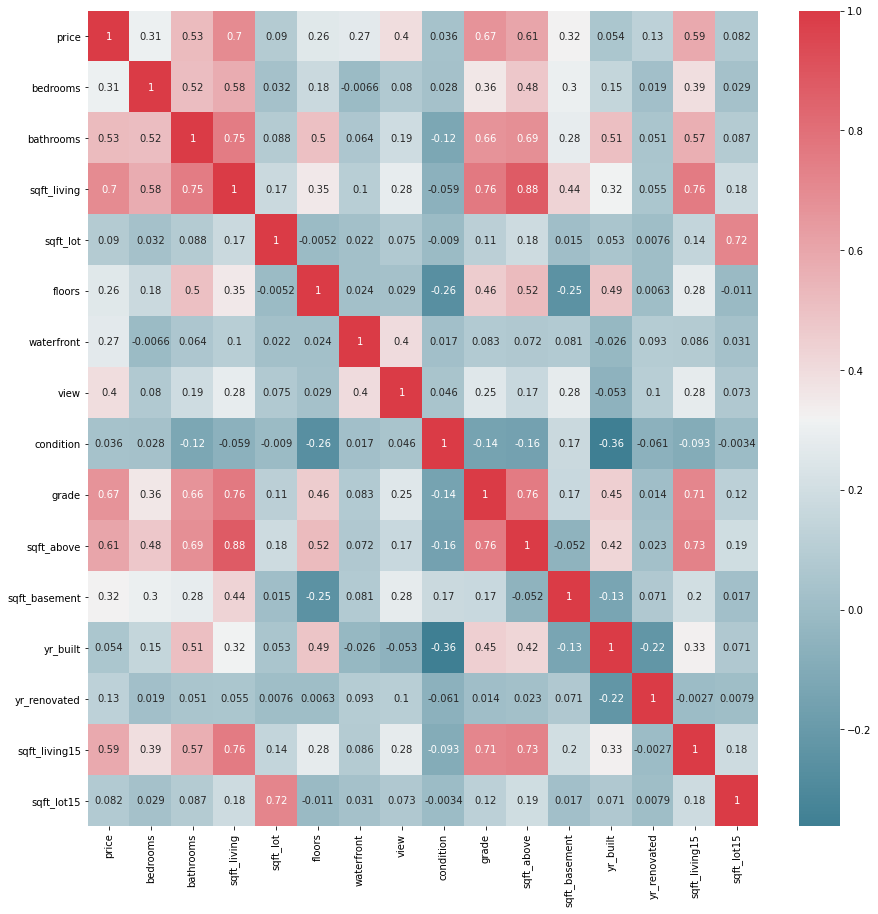

In [106]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Scaled_df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

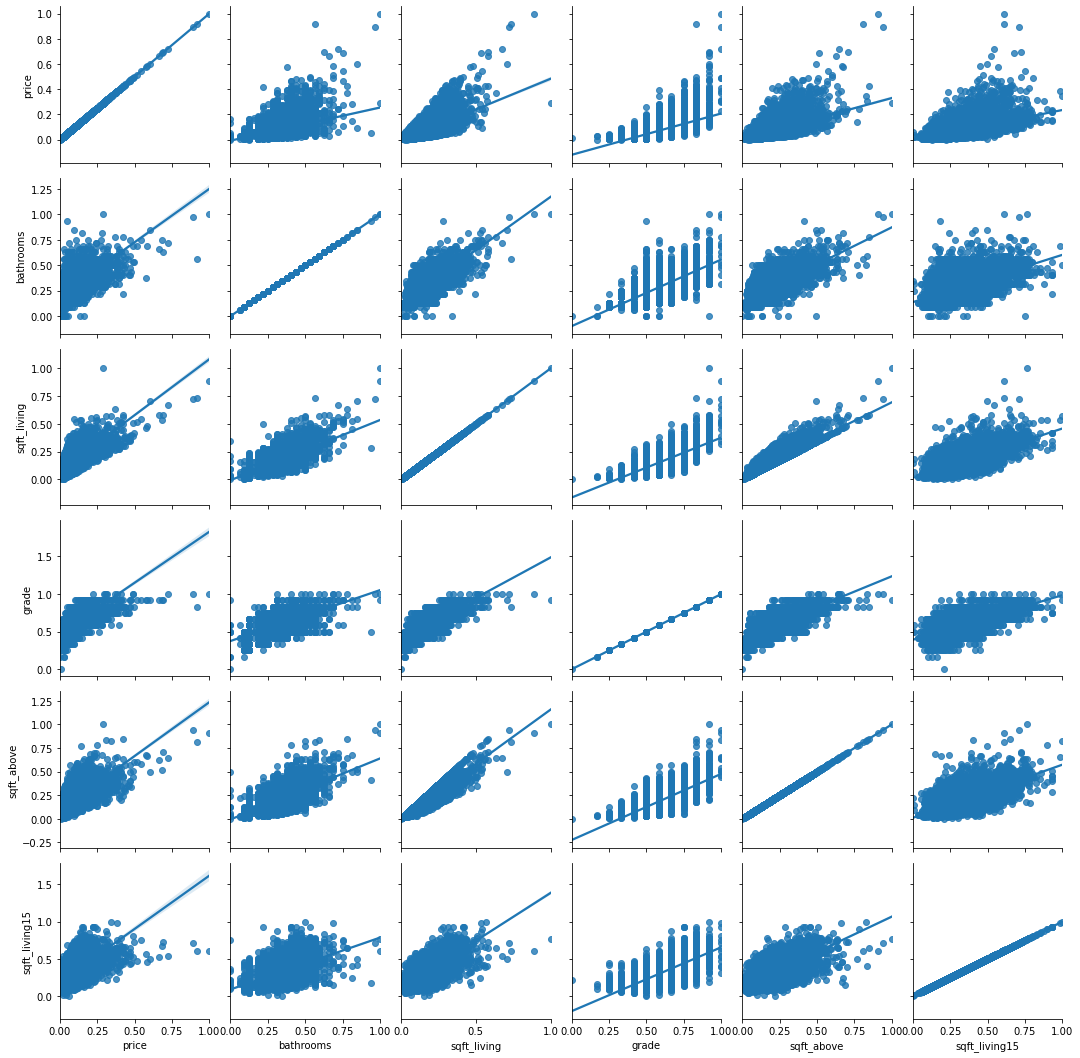

In [107]:
g = sns.PairGrid(Scaled_df[['price','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
g.map(sns.regplot)

<AxesSubplot:xlabel='grade', ylabel='price'>

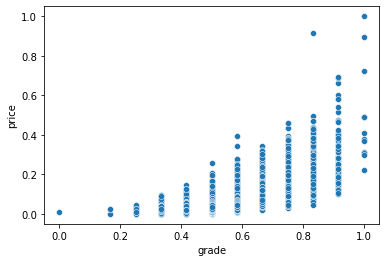

In [108]:
sns.scatterplot(x="grade", y="price", data=Scaled_df, palette="Set3")

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

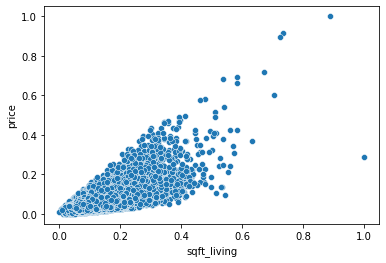

In [109]:
sns.scatterplot(x="sqft_living", y="price", data=Scaled_df, palette="Set3")

2. Write a paragraph selecting the most important features (feature selection). 

To begin with the least important features, those would be id, sqft_lot15, long, lat, zipcode, yr_renovated, condition, view, waterfront, and sqft_lot. These features have little to no corelation with any of the other features, and thus are fairly useless when wanting to predict other features. 

The most important features are price, bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, sqft_basement, yr_built, and sqft_living15. These features have significant corelations with other features, and are thus usefull when wanting to predict other features. 	

I have decided I want to predict the price of a house (feature: price), based on the grade given to the house (feature: grade), and on the square footage of the house (feature: sqft_living). Based on the heatmap and the scatterplot, I have determined that these two features have the strongest corelations with the price feature (respectively 0.7 and 0.67)

In [110]:
#3. Split your dataset into a training set and a testing set. 

x=Scaled_df["grade"].values[:,np.newaxis]
y=Scaled_df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) 

#4. Apply Linear regression to your training set. 
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.0011787617830787502
R squared 0.455204231153296


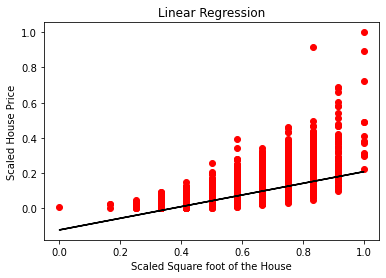

In [111]:
#5. Plot the linear regression. 

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Scaled House Price")
plt.xlabel("Scaled Square foot of the House")
plt.plot(x,model.predict(x),color="k")
plt.show()


In [112]:
#5. Measure the performance of linear regression using the testing set. 

print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

train Accuracy 0.4454407025605328
test Accuracy 0.4454407025605328


In [113]:
#6. Apply multi-linear regression and compare it to the linear model. 

x=Scaled_df[["grade","sqft_living"]]  
y=Scaled_df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.00098547720155919
R squared 0.54453578542216


In [114]:
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

train Accuracy 0.5344702900315791
test Accuracy 0.5344702900315791


In [115]:
#7. Apply Polynomial regression and compare it to linear and multilinear regression. 

x= Scaled_df[["grade", "sqft_living"]]
y= Scaled_df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.0009023861440607986
R squared:  0.5829385035997798


In [116]:
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

train Accuracy 0.5344702900315791
test Accuracy 0.5344702900315791


Linear regression
- MSE 0.0011787617830787502
- R squared 0.455204231153296
- train Accuracy 0.4454407025605328
- test Accuracy 0.4454407025605328

Multi-linear regression
- MSE 0.00098547720155919
- R squared 0.54453578542216
- train Accuracy 0.5344702900315791
- test Accuracy 0.5344702900315791

Polynomial regression
- MSE:  0.0009023861440607986
- R squared:  0.5829385035997798
- train Accuracy 0.5344702900315791
- test Accuracy 0.5344702900315791

As we compare the results of the three types of regression, it becomes evident that polynomial regression here gives the most accurate predictions, followed by multi-linear regression and linear regression. 

The Mean Squared Error declines when we switch from linear regression to multi-linear regression, and again when we move to polynomial regression.  

When looking at the R squared, we can see that just below half of the output variation can be explained by the model's input with linear regression. This improves when we move from linear regression to multi-linear regression, and again when we move to polynomial regression. 

At all three types of regression, we see that the train accuracy and test accuracy are the same, which proves that the model was neither over- or unerfitted, but that it can consistenly produce new features on a reliable and constant basis. 

Finally, we see that both the train and test accuracies improve was we move from linear regression to multi-linear regression, but stays the same when we move to Polynomial. 

All these factors show us that the polynomial regression is the most accurate, as it produces the smallest MSE, the highest R squared, and the highest train and test accuracy, meaning this is the best model to predict a house's price.
